# **ÁRBOLES DE DECISIÓN**


## **Introducción**


Los **árboles de decisión** son una familia amplia de **clasificadores no lineales**. Funcionan como un sistema de decisión de varias etapas, donde las clases son rechazadas iterativamente hasta llegar a una clase finalmente aceptada. Estos clasificadores ofrecen **ventajas** cuando hay un **gran número de clase** y **atributos** involucrados.

En estos clasificadores, el **espacio de características** es **dividido secuencialmente** en regiones que corresponden a las clases. Al analizar un vector de característica, la búsqueda de la región a la que se asigna se logra mediante una **secuencia de decisiones** a lo largo de una ruta de nodos en un árbol construido por el clasificador.

La **fase de entrenamiento** consiste en construir el árbol de decisión, y la **fase de predicción** utiliza el árbol para asignar la clase de manera eficiente.

Algunos de los tipos de regiones que dividen el espacio son:
* Hiperrectángulos paralelos a los ejes
* Poliedros convexos
* Hiperplanos no paralelos a los ejes.
* Pedazos de esferas

## **Ordinary binary classification trees (OBCTs)**



En este clasificador, la secuencia de decisión se aplica para un atributo específico $l^*$ y la pregunta que debe responderse es:
**¿la característica $x_{l^*}$ es menor o igual a un umbral $\alpha$?**.



Sus **ventajas** son:
* Facilidad para clasificar un patrón con **pocas observaciones**,
* La posibilidad de **mezclar variables numéricas y categóricas** (aunque la librería de **scikit-learn** aún no lo permite)
* Fáciles de interpretar y entender.
* Pueden visualizarse el árbol.
* Requieren poca preparación de datos (normalizar, usar transformación *one-hot-encoder*)
* Es un método **no paramétrico**, por lo cual, no requiere conocer o hacer supuestos sobre la distribución de los datos.
* Suelen ser robustos a los **atípicos**.


**Desventajas**:

* Pueden sobreajustarse si no se controla la complejidad del árbol mediante mecanismos de poda (número mínimo de muestras para dividir un nodo; profundidad máxima, etc.).
* Las predicciones de los árboles de decisión no son uniformes ni continuas, sino aproximaciones constantes por partes.
* El problema de aprender un árbol de decisión óptimo es **NP-Completo** para varios criterios de decisión y forma de regiones, en consecuencia, los algoritmos prácticos para su construcción son heurísticos, los cuales no aseguran obtener el árbol de decisión globalmente óptimo.
* Pueden crearse árboles sesgados si algunas clases predominan, por lo tanto, suele recomendarse **equilibrar el conjunto de datos** antes de ajustar el árbol de decisión. El balanceo de clases puede lograrse muestreando un número igual de muestras de cada clase o, preferiblemente, normalizando la suma de los pesos de las muestras de cada clase al mismo valor.

En general, el costo computacional de ejecución para construir un árbol binario equilibrado es de
$$O(ln\log(n))$$
donde $n$ es el número de datos de entrenamiento y $l$ su dimensión. Mientras que el tiempo de consulta (determinar la clase de una nueva muestra) es:

$$O(\log(n))$$

### Ejemplo:

**Regiones de decisión**

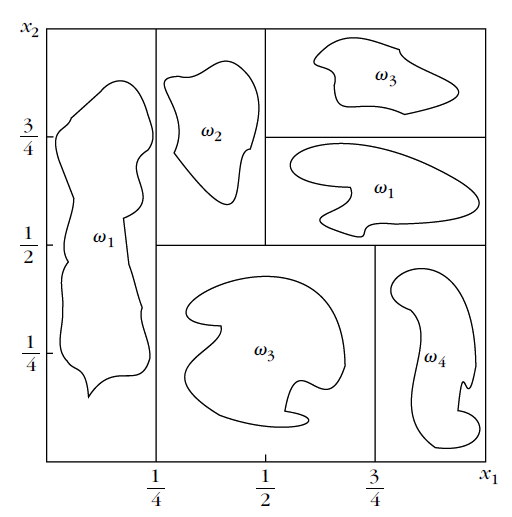

**Árbol de decisión**

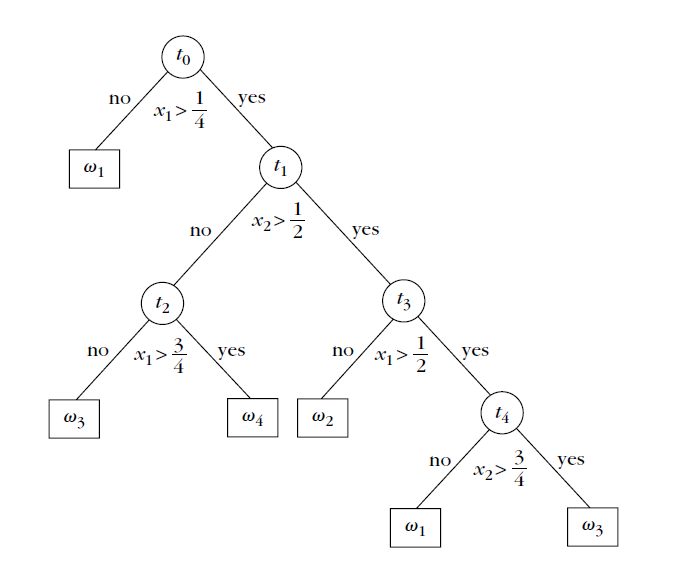

## **Diseño de un clasificador de árbol de decisión**



Para diseñar el árbol de decisión en la **etapa de entrenamiento** deben considerarse los siguientes pasos:

* Definir el **conjunto de preguntas**. Cada nodo define una pregunta que corresponde a una **división binaria** con dos nodos descendientes. Cada nodo $t$ está asociado a un subconjunto específico $X_t$ del conjunto de entrenamiento $X$. Entonces la división de un nodo es equivalente a la división del subconjunto $X_t$ en dos subconjuntos descendientes $X_t^Y$ (*yes*) y $X_t^N$ (*no*). El primer nodo del árbol (la raíz) está asociado al conjunto de entrenamiento completo $X$.
* Adoptar un **criterio de división**.
* Definir una **regla de paro**, que controle el crecimiento del árbol, y defina cuando un nodo es **terminal (hoja)**.
* Una regla que **asigne** cada **hoja a una clase**.

### **a) Conjunto de preguntas**



Para los árboles OBCT, cada pregunta tiene la forma: **¿Es $x_{l^*} \leq \alpha$?** Para cada característica, el umbral $\alpha$ define una división del subconjunto $X_t$.

Dado el subconjunto $X_t \subset X$ que corresponde al nodo $t$. Para cada característica $l$ puede usarse $N_{tl}$ umbrales que corresponden a los **puntos medios** entre valores distintos consecutivos de las observaciones $x\in X_t$. Por lo tanto, el total de preguntas candidatas para un nodo es:
$$ \sum_{l=1}^L N_{tl}$$
De entre esas opciones, sólo una puede elegirse, de acuerdo con un criterio de división.

### **b) Criterio de división**

El diseño del árbol de decisión busca que cada división **amplie la homogeneidad** de clase de $X_t^Y$ y $X_t^N$ en comparación con el subconjunto del nodo ancestro $X_t$. Esto significa que los vectores de características en cada uno de los nuevos subconjuntos muestran mayor preferencia por clases específicas, mientras que los datos en $X_t$ están distribuidos de manera más equitativa entre las clases.

Sea $P(\omega_i| t)$ la probabilidad de que un vector $x$ en el subconjunto $X_t$ (asociado al nodo $t$ pertenezca a la clase $\omega_i$, $i=1,...,K$, con $K$ el número de clases). Una medida utilizada comúnmente para medir la **homogeneidad** (**impureza** en el lenguaje de reconocimiento de patrones) de una partición es la **entropía de Shannon**:
$$I(t) = - \sum_{i=1}^K P(\omega_i |t) \log_2{P(\omega_i|t})$$

donde $\log_2$ es el logaritmo base 2. En la práctica, las probabilidades $P(\omega_i |t)$ son estimadas por los porcentajes:

$$\frac{N_t^i}{N_t}$$
donde $N_t^i$ es el número de puntos en $X_t$ que pertenecen a la clase $\omega_i$.

El máximo valor de $I(t)$ ocurre cuando todos los puntos en $X_t$ están repartidas equitativamente entre las clases, y es igual a 0 si todos los datos pertenecen a una sola clase.



Otras medidas de impureza son:

* El **Índice de Gini**:

$$I_G(t) = 1 - \sum_{i=1}^{K} P(\omega_i |t)^2$$

* El **error de clasificación**:

$$I_E(t) = 1- \max_{i=1,\ldots, K} P(\omega_i |t)$$

El **decrecimiento de impureza** es definido como:

$$\triangle I(t) = I(t) - \frac{N_t^Y}{N_t}I(t^Y) - \frac{N_t^N}{N_t}I(t^N)$$

Entonces el objetivo es elegir una pregunta con el mayor decrecimiento de impureza.

### **c) Regla de paro**



* Establecer un umbral $\omega$ y detener la división si el máximo valor de $\triangle I(t)$ para todas las posibles divisiones es menor que $\omega$.

* Establecer un umbral $\omega$ y detener la división si la cardinalidad de $X_t$ es menor que $\omega$ o todas las clases pertenecen a una clase.

### **d) Reglas de asignación**

Una vez que un nodo del árbol es declarado como hoja, se le asigna una etiqueta de clase. Una regla utilizada generalmente es la **regla de la mayoría**, es decir, la hoja está etiquetada como $\omega_j$ donde
$$ \omega_j = \arg \max_{i \in \omega_i} P(\omega_i | t)$$
es decir, a la clase a la que pertenecen la mayoría de los vectores en $X_t$.

## **Algoritmo para construir un árbol de decisión binario**

**Entrada:** $X$
1. Inicializar el nodo raíz, es decir, $X_t = X$.
2. Para cada nodo $t$:

  * Para cada característica $l=1,\ldots, L$

    * Para cada umbral $\alpha_{l,n}$ $n=1,\ldots, N_{t,l}$
      * Generar $X_t^Y$ y $X_t^N$
      * Calcular la mejora de homogeneidad $\triangle I(t)$
  * Elegir el atributo $l$ y su respectivo $\alpha^*$ que maximiza la mejora de homogeneidad
  * Si se logra la regla de paro, declarar al nodo $t$ como una hoja y asignar su etiqueta de clase.
  * Si no, generar las dos clases descendientes $t^Y$ y $t^N$ con sus respectivos subconjuntos $X_t^Y$ y $X_t^N$.

## **Notas**

* Un factor crítico del diseño de un árbol de decisión es su **tamaño**. Debe ser suficientemente grande, pero no demasiado, de lo contrario aprenderá los detalles particulares del conjunto de entrenamiento (sobreajuste) y tendrá un rendimiento pobre para clasificar datos desconocidos.

* Un inconveniente asociado con los clasificadores de árboles de decisión es su **varianza alta**. Pequeños cambios en el conjunto de datos de entrenamiento pueden resultar en árboles muy diferentes, debido a su naturaleza jerárquica: un error en los nodos altos se propaga hasta sus hojas descendientes. Una propuesta para reducir la varianza es el siguiente esquema: crear mediante técnicas **Boostrap**  nuevos conjuntos de entrenamiento $X_1, X_2,\ldots, X_B$ (**remuestreo uniforme de $X$ con remplazo**). Para cada variante de entrenamiento $X_i$ se construye un árbol de decisión $T_i$. La decisión final es a favor de la clase predicha por la mayoría de los subclasificadores $T_i$, $i=1,\ldots, B$ (esta idea es la base de los **bosques aleatorios**)

* Usar otro tipo de regiones, por ejemplo, hiperplanos oblicuos (no paralelos a los ejes) puede mejorar el rendimiento del clasificador, pero hacerlo menos eficiente.

* Los árboles de decisión tienden a **sobreajustarse** en datos con un **gran número de características**. Obtener la proporción correcta de muestras por número de características es importante, ya que un árbol con pocas muestras en un espacio de alta dimensión es muy propenso a sobreajustarse.
 * Considere realizar una **reducción de dimensionalidad** (**PCA**, **ICA** o **selección de características**) con antelación para que su árbol tenga más probabilidades de encontrar características discriminantes.


# **Ejemplo**

## **DecisionTreeClasifier**


In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier(criterion='gini',
                       max_depth = None,
                       min_samples_split=2,
                       min_samples_leaf=1,
                       max_features=None)

**Parámetros**:

* ```criterion```: Define la medida de impureza de la división
  * ```gini``` (índice de Gini)
  * ```entropy``` (entropía de Shannon)
  * ```log_loss```

* ```max_depth```: Es la **profundidad máxima** del árbol, es decir, el número de vértices máximo entre la raíz y una hoja.

* ```min_samples_split```: Es el **número mínimo de observaciones** requeridos para poder **dividir un nodo** $t$. Si se entrega un entero, se considerará en términos absolutos, si se entrega un ```float``` se considerará como una fracción del total de muestras.

 * ```min_samples_leaf```: Es el **número de observaciones mínimo** para que un nodo sea **considerado una hoja**.

 * ```max_features```: Es el **número máximo de atributos** a considerar para buscar el umbral de división. Puede ser un entero, un ```float``` (fracción de $L$), 'sqrt' ($\sqrt{L}$) o 'log2' ($\log_2{L}$). Si es ```None``` se consideran todas las características.

## **Ejemplo**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Importar datos
from sklearn.datasets import load_iris
data = load_iris()
X = data["data"][:,0:2]
y = data["target"]

Clasificador de árbol de decisión

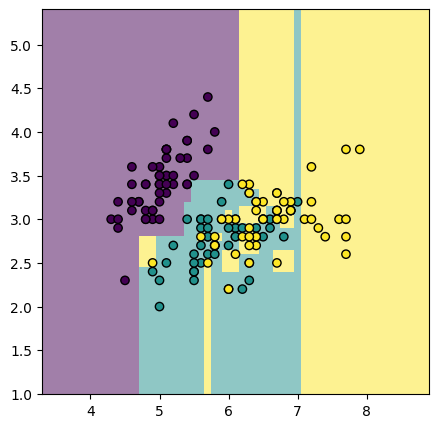

In [ ]:
clf = DecisionTreeClassifier().fit(X, y)
fig, ax = plt.subplots(figsize=(5, 5))
display = DecisionBoundaryDisplay.from_estimator(clf, X,
                                                  response_method="predict",
                                                  alpha=0.5, ax=ax,
                                                  grid_resolution=500,
                                                  plot_method="pcolormesh")
display.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

Clasificador de árbol de decisión con profunidad máxima igual 3

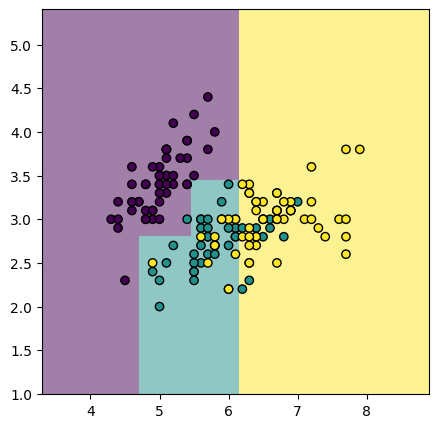

In [ ]:
clf = DecisionTreeClassifier(max_depth=3).fit(X, y)
fig, ax = plt.subplots(figsize=(5, 5))
display = DecisionBoundaryDisplay.from_estimator(clf, X,
                                                  response_method="predict",
                                                  alpha=0.5, ax=ax,
                                                  grid_resolution=500,
                                                  plot_method="pcolormesh")
display.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

Comparación de exactitud utilizando diferentes parámetros de entrenamiento de datos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

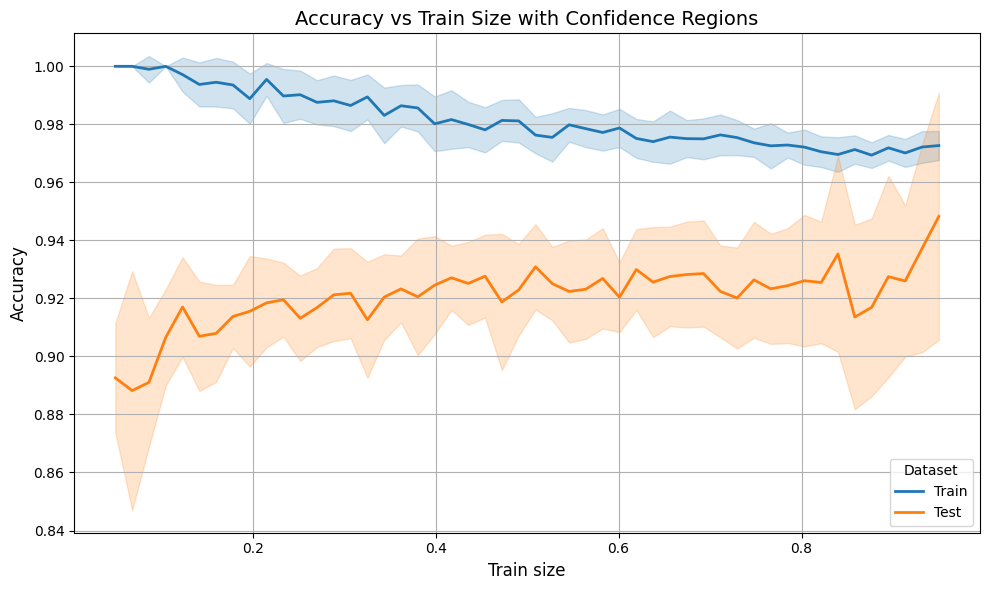

In [ ]:
# Parámetros
train_sizes = np.linspace(0.05, 0.95, 50)
n_runs = 20

results = []

for train_size in train_sizes:
    for _ in range(n_runs):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=None)
        clf = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)

        results.append({
            "Train size": train_size,
            "Accuracy": metrics.accuracy_score(y_train, y_pred_train),
            "Dataset": "Train"
        })
        results.append({
            "Train size": train_size,
            "Accuracy": metrics.accuracy_score(y_test, y_pred_test),
            "Dataset": "Test"
        })

df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Train size", y="Accuracy", hue="Dataset", errorbar='sd', linewidth=2)
plt.title("Accuracy vs Train Size with Confidence Regions", fontsize=14)
plt.xlabel("Train size", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

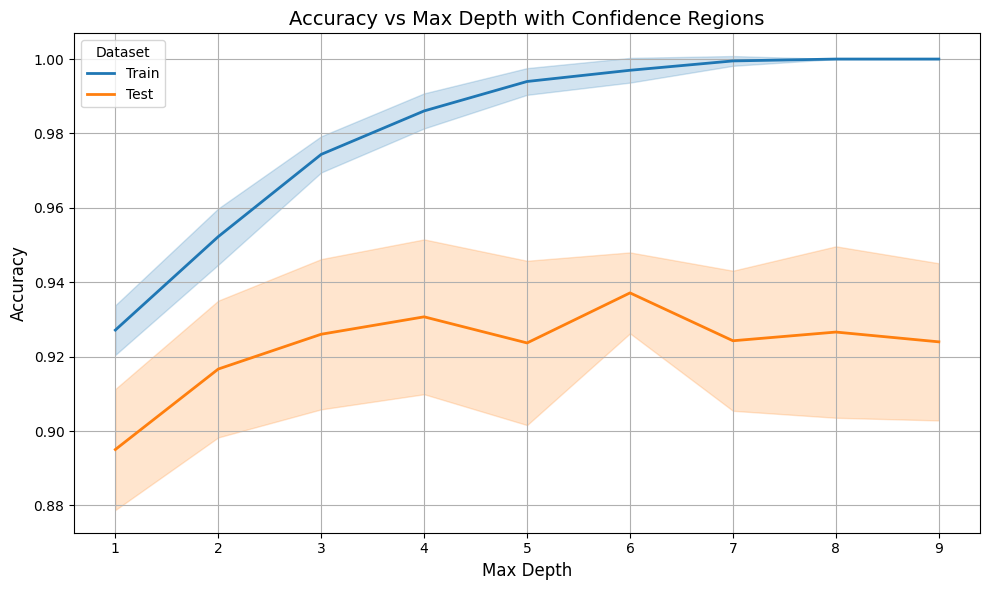

In [ ]:
# Parámetros
max_depths = range(1, 10)  # Profundidades de 1 a 20
n_runs = 20                # Repeticiones
train_size = 0.7           # Fijo el tamaño de entrenamiento

# Resultados
results = []

for depth in max_depths:
    for _ in range(n_runs):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=None)
        clf = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)

        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)

        results.append({
            "Max Depth": depth,
            "Accuracy": metrics.accuracy_score(y_train, y_pred_train),
            "Dataset": "Train"
        })
        results.append({
            "Max Depth": depth,
            "Accuracy": metrics.accuracy_score(y_test, y_pred_test),
            "Dataset": "Test"
        })

# Crear DataFrame
df = pd.DataFrame(results)

# Gráfica
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Max Depth", y="Accuracy", hue="Dataset", errorbar='sd', linewidth=2)
plt.title("Accuracy vs Max Depth with Confidence Regions", fontsize=14)
plt.xlabel("Max Depth", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

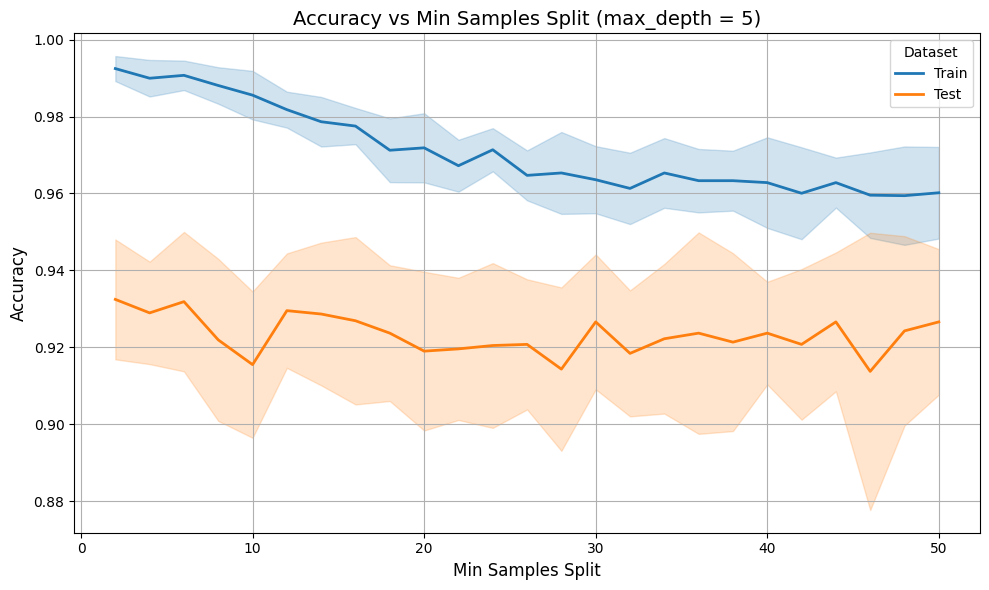

In [ ]:
# Parámetros
min_splits = range(2, 51, 2)  # Valores de 2 a 50 en saltos de 2
n_runs = 20                   # Repeticiones por valor
train_size = 0.7              # Tamaño fijo del set de entrenamiento
max_depth = 5                 # Profundidad fija para el árbol

# Resultados
results = []

for min_split in min_splits:
    for _ in range(n_runs):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=None)
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_split).fit(X_train, y_train)

        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)

        results.append({
            "Min Samples Split": min_split,
            "Accuracy": metrics.accuracy_score(y_train, y_pred_train),
            "Dataset": "Train"
        })
        results.append({
            "Min Samples Split": min_split,
            "Accuracy": metrics.accuracy_score(y_test, y_pred_test),
            "Dataset": "Test"
        })

# Crear DataFrame
df = pd.DataFrame(results)

# Graficar
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Min Samples Split", y="Accuracy", hue="Dataset", errorbar='sd', linewidth=2)
plt.title(f"Accuracy vs Min Samples Split (max_depth = {max_depth})", fontsize=14)
plt.xlabel("Min Samples Split", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

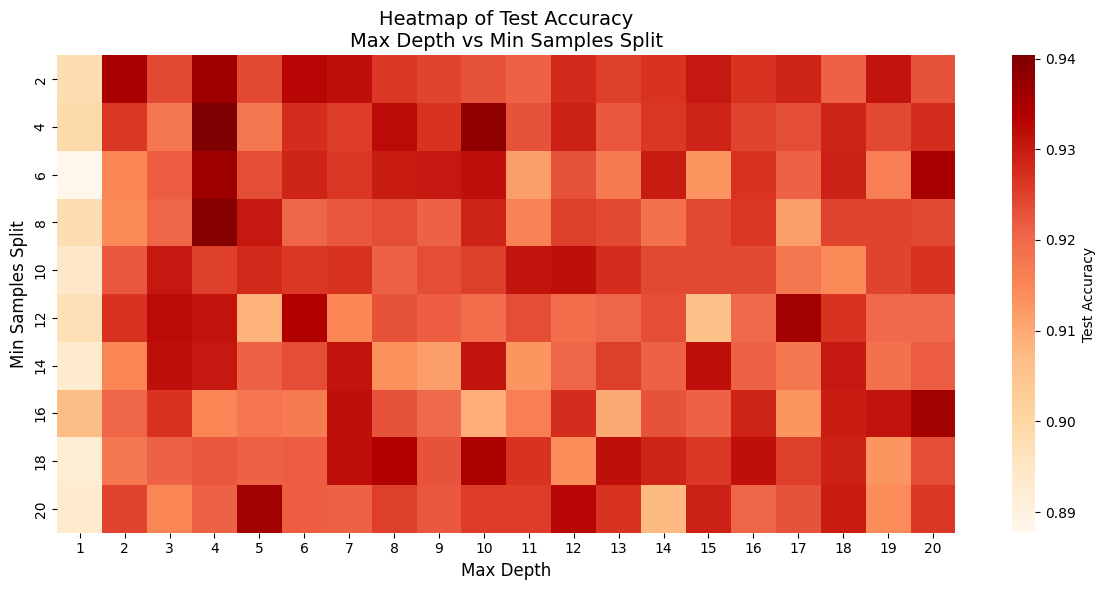

In [ ]:
# Parámetros
max_depths = range(1, 21)              # Profundidades de 1 a 20
min_splits = range(2, 21, 2)           # Valores de min_samples_split de 2 a 20
n_runs = 10                            # Repeticiones
train_size = 0.7

# Almacenar resultados
results = []

for max_depth in max_depths:
    for min_split in min_splits:
        acc_test_list = []
        for _ in range(n_runs):
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=None)
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_split).fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            acc_test_list.append(metrics.accuracy_score(y_test, y_pred_test))

        results.append({
            "Max Depth": max_depth,
            "Min Samples Split": min_split,
            "Mean Test Accuracy": np.mean(acc_test_list)
        })

# Convertir a DataFrame y pivotear para heatmap
df = pd.DataFrame(results)
pivot_table = df.pivot(index="Min Samples Split", columns="Max Depth", values="Mean Test Accuracy")

# Graficar heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, fmt=".2f", cmap="OrRd", cbar_kws={'label': 'Test Accuracy'})
plt.title("Heatmap of Test Accuracy\nMax Depth vs Min Samples Split", fontsize=14)
plt.xlabel("Max Depth", fontsize=12)
plt.ylabel("Min Samples Split", fontsize=12)
plt.tight_layout()
plt.show()

### **Visualizar el árbol de decisión**

Una vez que se ajusta el árbol de decisión es posible mostrar la gráfica del árbol usando la función



```
 from sklearn.tree import plot_tree
```



In [ ]:
 from sklearn.tree import plot_tree

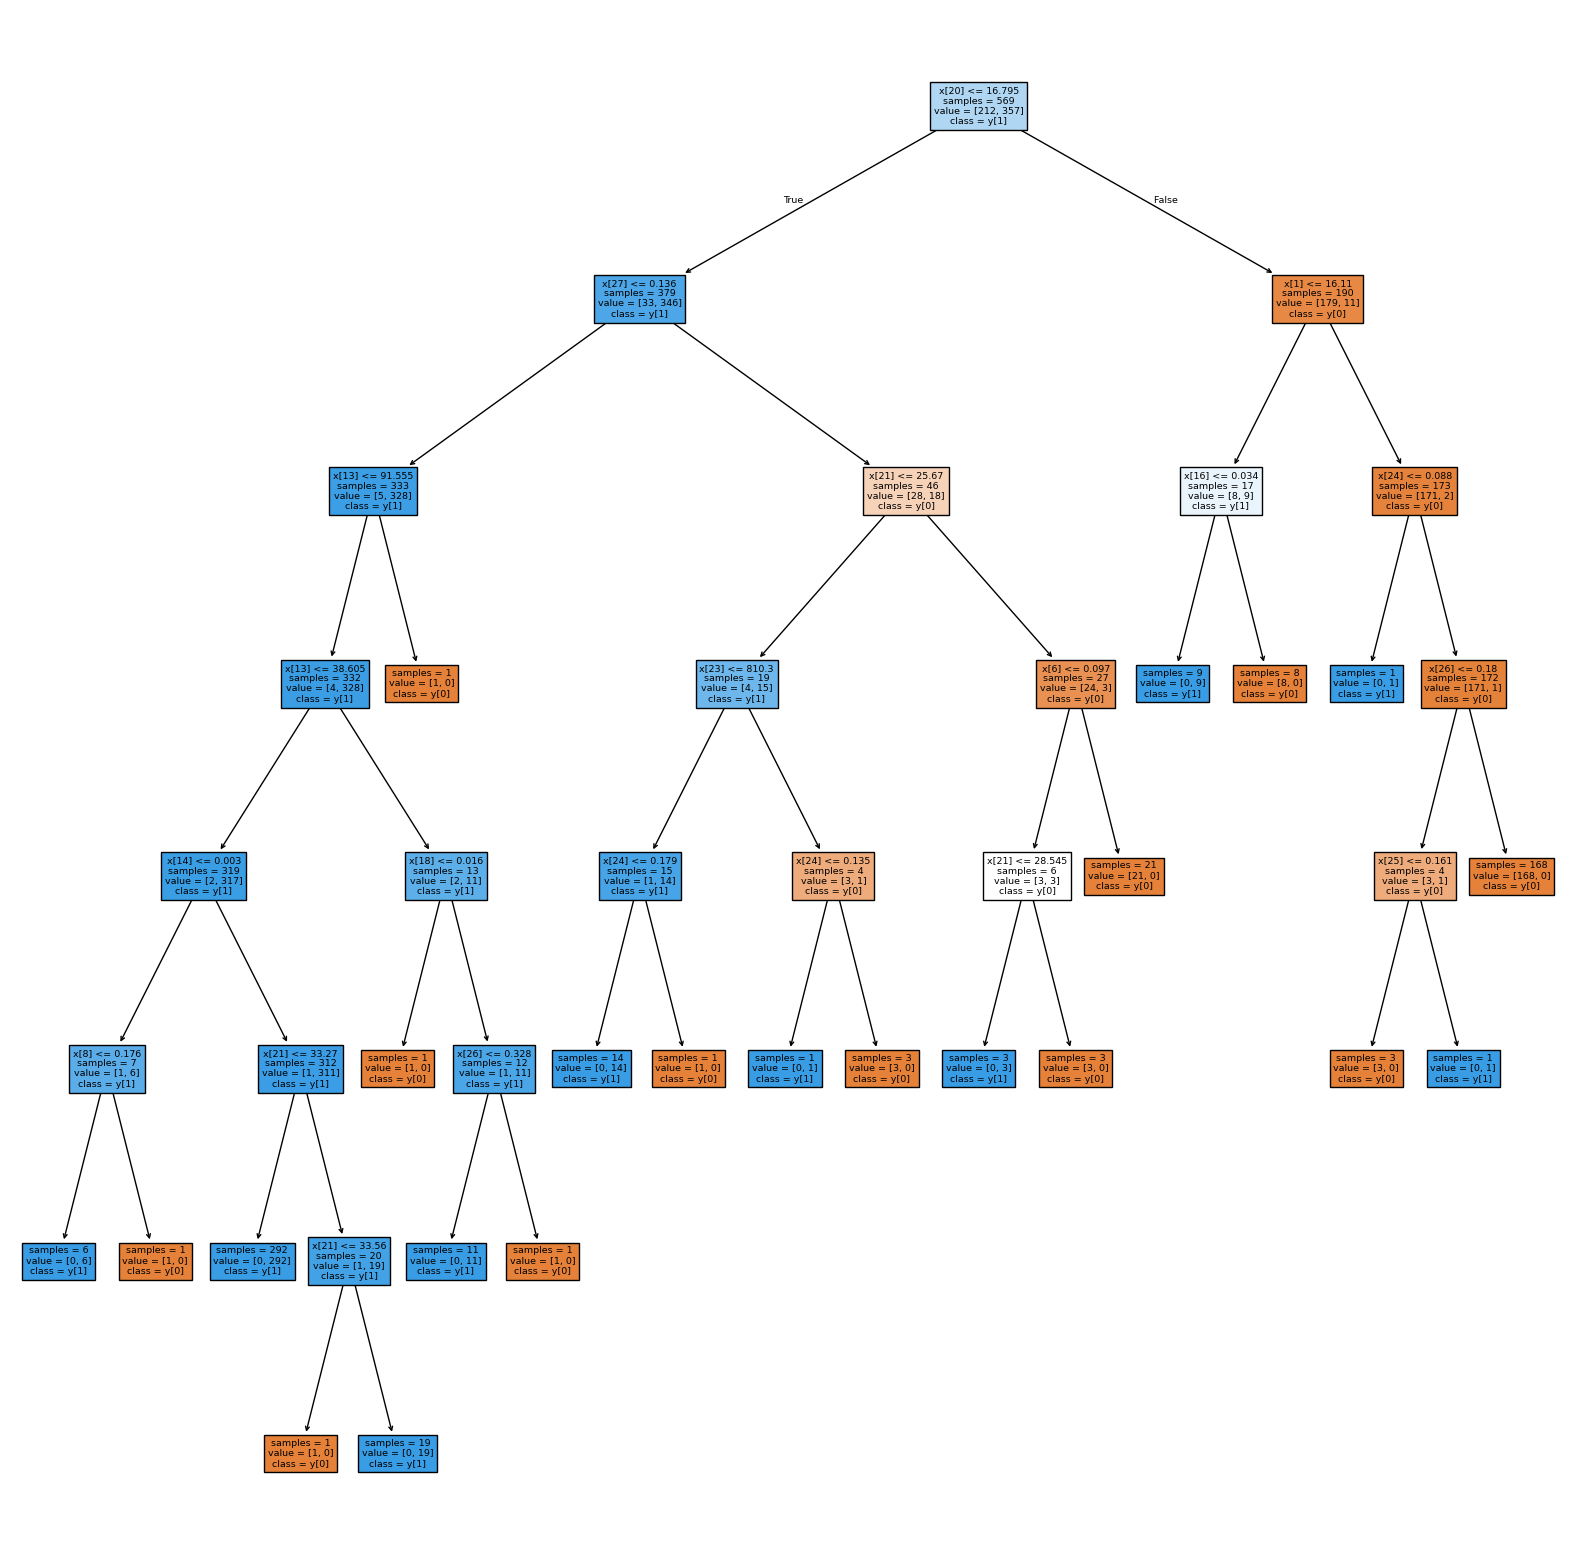

In [ ]:
clf = DecisionTreeClassifier().fit(X, y)
plt.subplots(figsize=(20, 20))
plot_tree(clf, class_names=True,
          filled=True, impurity=False)
plt.show()

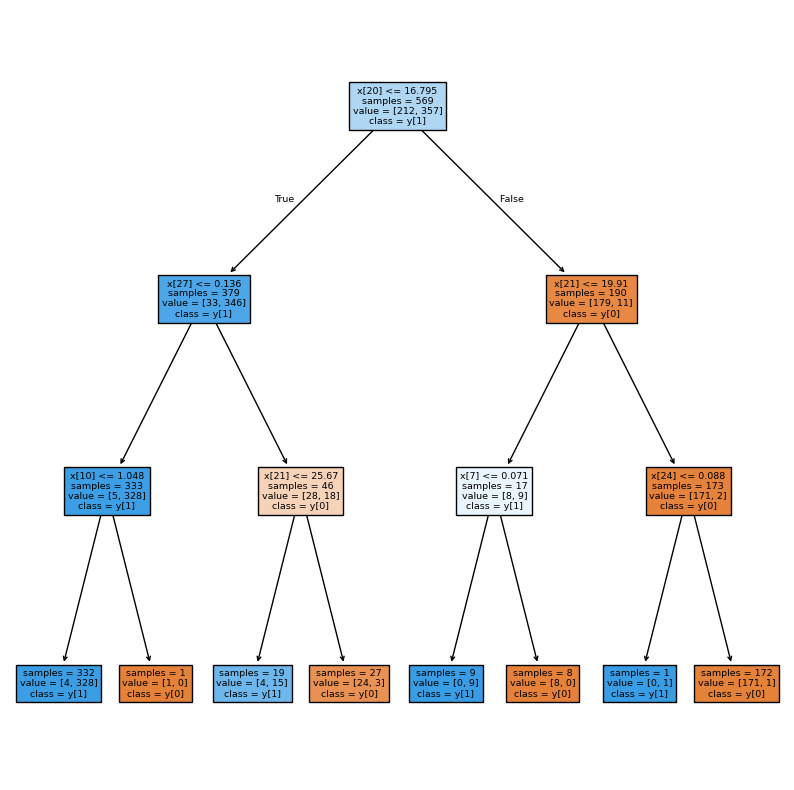

In [ ]:
clf = DecisionTreeClassifier(max_depth=3).fit(X, y)
plt.subplots(figsize=(10, 10))
plot_tree(clf, class_names=True,
          filled=True, impurity=False)
plt.show()

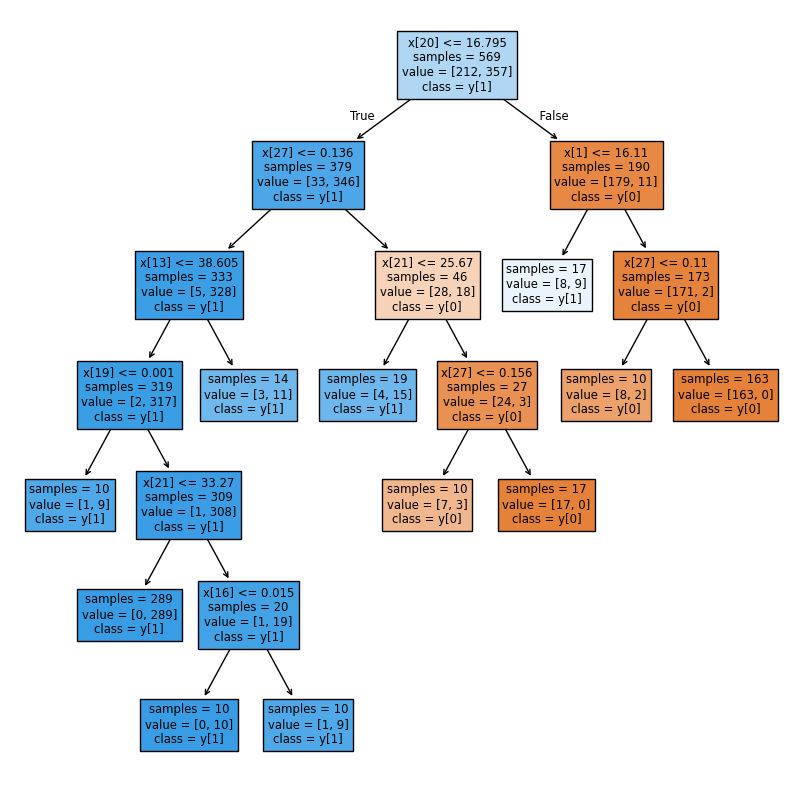

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=10).fit(X, y)
plt.subplots(figsize=(10, 10))
plot_tree(clf, class_names=True,
          filled=True, impurity=False)
plt.show()